In [78]:
!rm -rf data
!rm -rf going_modular
!rm -rf sample_data
!rm -rf helper_functions.py

In [79]:
import torch
import torchvision

In [80]:
try:
    from torchinfo import summary
except:
    !pip install -q torchinfo

try:
    from going_modular.going_modular import data_setup, engine
except:
    !git clone https://github.com/Kagankakao/My-AI-Journey
    !mv "My-AI-Journey/Computer Vision and PyTorch Fundamentals/going_modular" .
    !mv "My-AI-Journey/Computer Vision and PyTorch Fundamentals/helper_functions.py" .
    !rm -rf My-AI-Journey
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [81]:
image_path = download_data("https://github.com/Kagankakao/My-AI-Journey/raw/main/data/pizza-steak-sushi.zip",
                           destination="pizza-steak-sushi")
image_path

[INFO] Did not find data/pizza-steak-sushi directory, creating one...
[INFO] Downloading pizza-steak-sushi.zip from https://github.com/Kagankakao/My-AI-Journey/raw/main/data/pizza-steak-sushi.zip...
[INFO] Unzipping pizza-steak-sushi.zip data...


PosixPath('data/pizza-steak-sushi')

In [82]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [83]:
from torchvision import transforms

IMAGE_SIZE = 224

manual_transform = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                       transforms.ToTensor()])

In [84]:
from going_modular.going_modular import data_setup

BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir,
    test_dir,
    manual_transform,
    BATCH_SIZE)

In [85]:
image_batch, label_batch = next(iter(train_dataloader))

image, label = image_batch[0], label_batch[0]

image, label

(tensor([[[0.2745, 0.1412, 0.0784,  ..., 0.2118, 0.1922, 0.1922],
          [0.0784, 0.1098, 0.1882,  ..., 0.1882, 0.1765, 0.1765],
          [0.2471, 0.3020, 0.3490,  ..., 0.4275, 0.4000, 0.5216],
          ...,
          [0.4902, 0.4941, 0.4980,  ..., 0.4118, 0.3373, 0.3373],
          [0.4902, 0.4980, 0.5020,  ..., 0.4706, 0.4471, 0.4627],
          [0.4980, 0.4980, 0.5020,  ..., 0.4745, 0.4824, 0.4784]],
 
         [[0.0235, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
          [0.0039, 0.0078, 0.0196,  ..., 0.0314, 0.0275, 0.0471],
          [0.0353, 0.0471, 0.0706,  ..., 0.1137, 0.1137, 0.3255],
          ...,
          [0.3686, 0.3686, 0.3725,  ..., 0.2863, 0.2235, 0.2196],
          [0.3608, 0.3647, 0.3647,  ..., 0.3451, 0.3255, 0.3373],
          [0.3490, 0.3608, 0.3647,  ..., 0.3529, 0.3529, 0.3569]],
 
         [[0.1176, 0.1137, 0.1137,  ..., 0.1137, 0.1098, 0.1137],
          [0.1020, 0.1059, 0.1098,  ..., 0.1020, 0.1098, 0.1255],
          [0.1098, 0.1098, 0.1137,  ...,

(-0.5, 63.5, 63.5, -0.5)

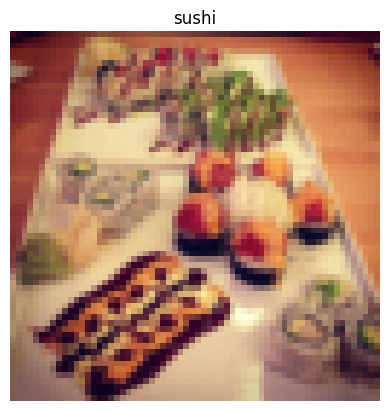

In [88]:
import matplotlib.pyplot as plt

plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)